Create Heatmaps for Weather Parameters

In [1]:
!pip install gmaps

In [2]:
# Import the dependencies.
import pandas as pd

#import gmaps
import gmaps

import requests

# Import the API key.
from config import g_key

In [3]:
# Import the random module.
import random

# Import the NumPy module.
import numpy as np

# Import timeit.
import timeit

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Import Matplotlib.
import matplotlib.pyplot as plt

In [4]:
# Import the depencencies
#import matplotlib as plt

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the citipy module to determine city based on latitude and longitude.
from citipy import citipy


#Import the time module.
import time

# Import the requests library. 
import requests

# Import the API key. 
from config import weather_api_key

In [5]:
# Dependencies and Setup
import gmaps

# Import API key
from config import g_key

# Configure gmaps API key
gmaps.configure(api_key=g_key)

In [6]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,yarada,17.6500,83.2667,87.80,62,20,5.75,IN,2021-03-15 06:07:19
1,1,khatanga,71.9667,102.5000,-19.19,90,100,11.97,RU,2021-03-15 06:01:27
2,2,lalibela,12.0333,39.0333,69.96,38,10,1.50,ET,2021-03-15 06:07:19
3,3,east london,-33.0153,27.9116,75.18,74,77,5.70,ZA,2021-03-15 06:07:20
4,4,arani,12.6667,79.2833,91.53,30,5,6.35,IN,2021-03-15 06:07:20


In [7]:
# Get the data types. 
city_data_df.dtypes

City_ID         int64
City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date           object
dtype: object

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Add np.random.uniform(-90.000, 90.000, size=500)
np.random.uniform(-90.000, 90.000, size=500)

array([ 8.54561157e+01,  3.88348745e+01, -7.48250654e+01,  3.88851348e+01,
        3.95915766e+00, -5.76412100e+00, -5.78279787e+01, -4.15117345e+01,
       -6.58121246e+00, -2.56165290e+01,  2.76011595e+00, -6.70452532e+01,
       -5.96629946e+01, -7.86022659e+01,  6.82202596e+01,  8.23515198e+01,
       -1.93120126e+01,  8.08958782e+01,  4.88885305e+01,  3.14208241e+01,
        9.28354942e+00, -6.24666126e+01, -8.99657565e+01,  3.38688686e+01,
        4.34558937e+01,  6.68257309e+01, -6.79140107e+00, -6.53718856e+01,
       -2.11919821e+01, -7.68715283e+01,  1.60710488e+00,  3.42514705e+01,
       -3.89084410e+01, -4.99487273e+01, -7.06241149e-01,  1.81233649e+01,
        2.32760924e+01, -6.67985466e+01,  8.01996901e+01, -2.21000113e+01,
       -1.89965087e+01, -7.13317375e+01, -4.75280951e+00, -4.98550245e+01,
        6.19993185e+01, -1.91834620e+01, -6.81015129e+01,  2.21687466e+01,
        3.32752719e+00,  1.86345501e+01,  4.75041098e+01,  6.59285544e+01,
        6.48419343e+01,  

In [12]:
# Use the tuple() function to diplay the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
         citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

khatanga ru
ustka pl
talnakh ru
sarahan in
mys shmidta ru
tuatapere nz
hilo us
muromtsevo ru
tuktoyaktuk ca
qaqortoq gl
hilo us
lasa cn
ancud cl
victoria sc
vostok ru
victoria sc
hereford us
nanortalik gl
port hardy ca
cherskiy ru
nizhneyansk ru
illoqqortoormiut gl
ambon id
bambous virieux mu
gusau ng
hilo us
east london za
vila velha br
kapit my
cape town za
louis trichardt za
crab hill bb
khatanga ru
thompson ca
radyvyliv ua
carnarvon au
hermanus za
ushuaia ar
saint-philippe re
seymchan ru
emerald au
ancud cl
tasiilaq gl
vaini to
belushya guba ru
mataura pf
saint-philippe re
belushya guba ru
new norfolk au
matay eg
kruisfontein za
paamiut gl
chokurdakh ru
itarema br
ushuaia ar
chokurdakh ru
pierre us
tual id
nizhneyansk ru
gravelbourg ca
butaritari ki
thompson ca
puerto ayora ec
faanui pf
hobart au
russell nz
trelew ar
nemuro jp
kavieng pg
fort nelson ca
cividale del friuli it
bethel us
ust-ilimsk ru
albany au
marseille fr
busselton au
cape town za
taolanaro mg
trelew ar
qaanaaq gl
h

In [13]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

606

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=efb435aa214d5cc0802d4cec6043c5f5


In [15]:
# Loop through all the cities in our list. 
for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [16]:
# Loop through all the cities in the list. 
for i, city in enumerate(city_data):
    
    # Group cities in sets of 50 for logging purposes:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

In [17]:
# Loop through all the cities in the list. 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
#    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.

    try:
        # Parse the JSON and retrieve data.
        #print(requests.get(city_url))
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]


        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list. 
        city_data.append({"City": city,
                         "Lat": city_lat,
                         "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data loading is complete. 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | khatanga
Processing Record 2 of Set 13 | ustka
Processing Record 3 of Set 13 | talnakh
Processing Record 4 of Set 13 | sarahan
Processing Record 5 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 13 | tuatapere
Processing Record 7 of Set 13 | hilo
Processing Record 8 of Set 13 | muromtsevo
Processing Record 9 of Set 13 | tuktoyaktuk
Processing Record 10 of Set 13 | qaqortoq
Processing Record 11 of Set 13 | lasa
Processing Record 12 of Set 13 | ancud
Processing Record 13 of Set 13 | victoria
Processing Record 14 of Set 13 | vostok
Processing Record 15 of Set 13 | hereford
Processing Record 16 of Set 13 | nanortalik
Processing Record 17 of Set 13 | port hardy
Processing Record 18 of Set 13 | cherskiy
Processing Record 19 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 20 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 13 | ambon
Processing Record 22 of Set 13 | bambous

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,71.9667,102.5000,-19.19,90,100,11.97,RU,2021-03-15 06:13:16
1,ustka,54.5805,16.8619,37.60,94,100,12.75,PL,2021-03-15 06:17:08
2,talnakh,69.4865,88.3972,-20.83,84,34,2.46,RU,2021-03-15 06:13:11
3,sarahan,31.5167,77.8000,61.39,29,0,0.40,IN,2021-03-15 06:18:51
4,tuatapere,-46.1333,167.6833,57.00,65,73,17.00,NZ,2021-03-15 06:16:03
5,hilo,19.7297,-155.0900,71.60,83,90,4.61,US,2021-03-15 06:18:33
6,muromtsevo,56.3724,75.2418,12.15,96,100,7.67,RU,2021-03-15 06:18:52
7,tuktoyaktuk,69.4541,-133.0374,-9.40,77,90,11.50,CA,2021-03-15 06:18:53
8,qaqortoq,60.7167,-46.0333,37.40,52,75,57.53,GL,2021-03-15 06:18:53
9,lasa,46.6166,10.7002,32.00,100,90,3.44,IT,2021-03-15 06:15:27


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_column_order

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,71.9667,102.5000,-19.19,90,100,11.97,RU,2021-03-15 06:13:16
1,ustka,54.5805,16.8619,37.60,94,100,12.75,PL,2021-03-15 06:17:08
2,talnakh,69.4865,88.3972,-20.83,84,34,2.46,RU,2021-03-15 06:13:11
3,sarahan,31.5167,77.8000,61.39,29,0,0.40,IN,2021-03-15 06:18:51
4,tuatapere,-46.1333,167.6833,57.00,65,73,17.00,NZ,2021-03-15 06:16:03
...,...,...,...,...,...,...,...,...,...
549,san quintin,30.4833,-115.9500,53.94,85,71,14.32,MX,2021-03-15 06:22:13
550,puerto del rosario,28.5004,-13.8627,59.00,82,0,6.91,ES,2021-03-15 06:22:13
551,cimarron hills,38.8586,-104.6989,25.00,86,56,18.41,US,2021-03-15 06:22:14
552,nusaybin,37.0778,41.2178,53.60,66,90,4.61,TR,2021-03-15 06:22:14


In [22]:
# Add the "lats" key after the "sys" key. Continue with the 4 other keys.
lats = city_data_df
max_temps = city_data_df
humidity = city_data_df
cloudiness = city_data_df
wind_speed = city_data_df
print(lats, max_temps, humidity, cloudiness, wind_speed)

                   City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0              khatanga  71.9667  102.5000    -19.19        90         100   
1                 ustka  54.5805   16.8619     37.60        94         100   
2               talnakh  69.4865   88.3972    -20.83        84          34   
3               sarahan  31.5167   77.8000     61.39        29           0   
4             tuatapere -46.1333  167.6833     57.00        65          73   
..                  ...      ...       ...       ...       ...         ...   
549         san quintin  30.4833 -115.9500     53.94        85          71   
550  puerto del rosario  28.5004  -13.8627     59.00        82           0   
551      cimarron hills  38.8586 -104.6989     25.00        86          56   
552            nusaybin  37.0778   41.2178     53.60        66          90   
553            nichinan  31.6000  131.3667     64.40        55          75   

     Wind Speed Country                 Date  
0         11.97 

In [23]:
# Extract relevant fields from the DataFrame for plotting. (6.3.1)
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# #Import the time module.
#import time

# Get today's date in seconds.
today = time.time()
today

1615789335.760842

In [25]:
today = time.strftime("%x")
today

'03/14/21'

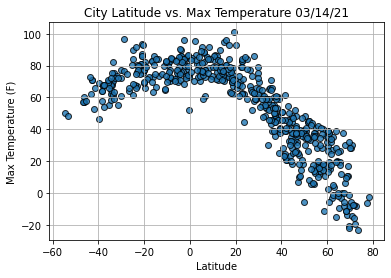

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidth=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

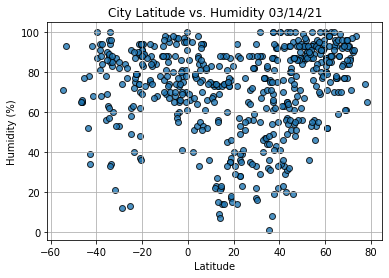

In [27]:
# #Buid the scatter plots for latitude and humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig.png")

# Show plot.
plt.show()

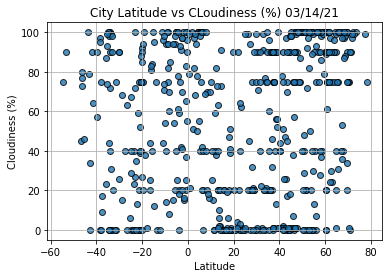

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs CLoudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid("True")

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

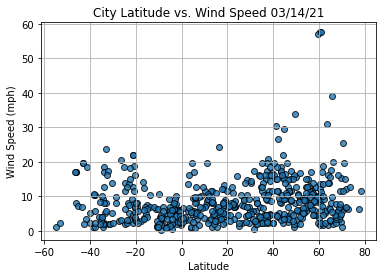

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [31]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [32]:
# Create Linegress
#linregress = (lats, temps)
#linregress

In [33]:
# Perform linear regression.
#(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
#(slope, intercept, r_value, _, _) = linregress(lats, temps)

# Get the equation of the line. 
#line_eq = "y = " + str(round(slope,2)) + "x+ " + str(round(intercept,2))
#print(line_eq)
#print(f"The p-value is: {p_value:.3f}")

In [34]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err, ) = linregress(lats, temps)
#linregress(lats, temps)


#(slope, intercept, r_value, _, _) = linregress(lats, temps)

#Get the equation of the line. 
line_eq = "y = " + str(round(slope,2)) + "x+ " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x+ 92.94
The p-value is: 0.011


Heatmaps

In [35]:
# First, tell gmaps to use your API key. 

# You only need to configure gmaps to use your API key once.

In [36]:
# Configure gmaps to use your Google API key.
#gmaps.configure(api_key=g_key)

In [37]:
# create the heatmap for the maximum temperature. 

In [38]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [39]:
# 1. Assign the locations to an array of latitude and longitude pairs.
#locations = city_data_df[["Lat", "Lng"]]
# 2. Assign the weights variable to some values.
#temperatures = # an array of length equal to the locations array length
#max_temp = city_data_df["Max Temp"]
# 3. Assign the figure variable to the gmaps.figure() attribute.
#fig = gmaps.figure()
# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
#heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)

# 5. Add the heatmap layer.
#fig.add_layer(heat_layer)
# 6. Call the figure to plot the data.
#fig

In [40]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps= []
for temp in max_temp:
    temps.append(max(temp, 0))

In [42]:
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = city_data_df[["Lat", "Lng"]]
# 2. Assign the weights variable to some values.
#temperatures = # an array of length equal to the locations array length
max_temp = city_data_df["Max Temp"]
# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()
# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])

# 5. Add the heatmap layer.
fig.add_layer(heat_layer)
# 6. Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
# Add the locations array and the values from the maximum temperature from our city_data_df DataFrame (Steps 1 &  2) and other steps above

In [44]:
# Heatmap of temperature
# Get the latitude and longitude.
#locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
#max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
#fig = gmaps.figure()
# Assign the heatmap variable.
#heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
#fig.add_layer(heat_layer)
# Call the figure to plot the data.
#fig

In [45]:
# Google heatmaps do not plot negative numbers. 

In [46]:
# If you have a maximum temperature that is less than 0 °F, then you will get an InvalidWeightException error for this line of code:

In [47]:
# heat_layer = gmaps.heatmap_layer(locations, weights=max_temp) is invalid

In [48]:
# To remove the negative temperatures we can use a for loop to iterate through the max_temp and add the temperatures that are greater than 0 °F to a new list.

In [49]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [50]:
# change the following code in the heat_layer:

# From
# heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)

# To
heat_layer = gmaps.heatmap_layer(locations, weights=temps)

In [51]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [52]:
# Replace temps with our code for the list comprehension so our heat_layer code (similar to above)

In [53]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [54]:
# This map is too large. Need to make some adjustments to the gmaps.figure() attribute.

Adjust Heatmap Zoom, Intensity, and Point Radius

In [55]:
# First, add the geographic center of Earth in the form of latitude and longitude (30.0° N and 31.0° E). 

# Also, add a zoom level so that only one map of Earth is shown.

In [56]:
# Add a center and zoom level to the gmaps.figure() attribute

In [57]:
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

Create a Percent Humidity Heatmap

In [58]:
# Now that the maximum temperature heatmap is created.

# Create the heatmap for humidity. 

# Can reuse the code and use the humidity values for the measurements.

In [59]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

Create a Percent Cloudiness Heatmap

In [60]:
# Replace the measurement from the humidity values to cloudiness values.

# Copy the code that created the previous heatmap and edit your code with the line clouds = city_data_df["Cloudiness"] so that the percent cloudiness replaces the percent humidity

# Set the variable weights=clouds, and run the code.

Create a Wind Speed Heatmap

In [61]:
# Final Heatmap

In [62]:
# Copy the code that created the previous heatmap and edit your code with the line wind = city_data_df["Wind Speed"] so that the wind speed replaces the percent cloudiness

# Set the variable weights=wind, and run the code.

Get Vacation Criteria

In [63]:
# Prompt the user to enter the minimum and maximum temperature ranges as floating-point decimal numbers to filter the city_data_df DataFrame.

In [64]:
# Reminder:
# Use the input() statement to prompt a user to enter information. 

In [65]:
# NOTE:
# To convert the input to a floating-point decimal number, wrap the input() statement with the float() method, like this: float(input()).

In [66]:
# Write two input statements for the app that will prompt the customer to add minimum and maximum temperature values and convert these values to floating-point decimals.

In [67]:
# Note:

# min_temp = 75

# max_temp = 90

In [68]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [69]:
# filter the maximum temperature column in the city_data_df DataFrame using logical operators to create a new DataFrame with the cities that meet the customer's criteria.

In [70]:
# Reminder:
#  Use the loc[] method on the current DataFrame to create a new DataFrame from a current DataFrame. Inside the brackets, add the conditional filter.

In [71]:
# The conditional filter will be city_data_df["Max Temp"] <= max_temp) & (city_data_df["Max Temp"]>= min_temp.

# Also, filter the city_data_df DataFrame "below code".

In [72]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
11,victoria,22.2855,114.1577,78.80,57,20,8.05,HK,2021-03-15 06:15:32
17,ambon,-3.6954,128.1814,89.60,66,20,5.75,ID,2021-03-15 06:18:57
18,bambous virieux,-20.3428,57.7575,77.00,94,75,6.91,MU,2021-03-15 06:18:58
20,east london,-33.0153,27.9116,75.20,83,0,8.05,ZA,2021-03-15 06:12:43
21,vila velha,-20.3297,-40.2925,75.20,88,40,3.44,BR,2021-03-15 06:18:59
27,carnarvon,-24.8667,113.6333,89.60,62,0,13.80,AU,2021-03-15 06:19:01
30,saint-philippe,-21.3585,55.7679,81.00,74,0,21.85,RE,2021-03-15 06:19:02
34,vaini,-21.2000,-175.2000,77.00,94,75,2.30,TO,2021-03-15 06:18:29
41,itarema,-2.9248,-39.9167,76.30,86,42,7.31,BR,2021-03-15 06:16:01
43,tual,-5.6667,132.7500,83.77,68,94,5.75,ID,2021-03-15 06:16:00


Null Values?

In [73]:
preferred_cities_df.count()

City          137
Lat           137
Lng           137
Max Temp      137
Humidity      137
Cloudiness    137
Wind Speed    137
Country       137
Date          137
dtype: int64

In [74]:
# Use ".dropna()" method to drop null values
clean_df=preferred_cities_df.dropna()

In [75]:
# 5a. Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = clean_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()

# 5b. Create a new column "Hotel Name"
hotel_df["Hotel Name"] = "Hotels"
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
11,victoria,HK,78.80,22.2855,114.1577,Hotels
17,ambon,ID,89.60,-3.6954,128.1814,Hotels
18,bambous virieux,MU,77.00,-20.3428,57.7575,Hotels
20,east london,ZA,75.20,-33.0153,27.9116,Hotels
21,vila velha,BR,75.20,-20.3297,-40.2925,Hotels
27,carnarvon,AU,89.60,-24.8667,113.6333,Hotels
30,saint-philippe,RE,81.00,-21.3585,55.7679,Hotels
34,vaini,TO,77.00,-21.2000,-175.2000,Hotels
41,itarema,BR,76.30,-2.9248,-39.9167,Hotels
43,tual,ID,83.77,-5.6667,132.7500,Hotels


In [76]:
# Using the latitude and longitude and specific parameters, use the Google Places Nearby Search request to retrieve a hotel and add it to the Hotel Name column.

Retrieve Hotels from a Nearby Search

In [77]:
# Set the Parameters for a Nearby Search

In [78]:
# 1. To find the nearest establishment to geographic coordinates, use the Google Places Nearby Search request. 

# 2. navigate to the Nearby Search requests page. 

In [79]:
# Next, we'll need to look at the documentation on the Python Requests Library

In [80]:
# The section "Passing Parameters In URLs" states that we can add the parameters as a dictionary of strings, using the params keyword argument requests.get('base URL', params=parameters).

In [81]:
# Add the parameters as key-value pairs. 

# Add the params dictionary, API key, type, and radius parameters

In [82]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [83]:
# 6b. Iterate through the hotel DataFrame.
for index, row in hotel_df.iterrows():

    # 6c. Get latitude and longitude from DataFrame
    lat = row["Lat"]
    lng = row["Lng"]
    params["location"] = f"{lat},{lng}"
    
    # 6d. Set up the base URL for the Google Directions API to get JSON data.
    base_url="https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # 6e. Make request and retrieve the JSON data from the search. 
    # NOTE: Can add the parameters as a dictionary of strings using the "params" keyword arguament requests.get{'base URL', params=parameteres}
    hotels = requests.get(base_url, params=params).json()
    
    # 6f. Get the first "hotel" from the "results" and store the "name", if a hotel isn't found "skip" the city. (Use Try, Except).
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
        found=hotels["results"][0]["name"]
        print(f"{found} Is Found.")
        
    except (IndexError):
        print("Hotel Is Not Found... Skipping")
    
    
    # (6.5.4)

Mini Hotel Central Is Found.
Swiss-Belhotel Ambon Is Found.
Casa Tia Villa Is Found.
Tu Casa Is Found.
Quality Suites Vila Velha Is Found.
Hospitality Carnarvon Is Found.
Chambres d'hôte "La Trinité" Is Found.
Keleti Beach Resort Is Found.
Sea Lounge! Bar, Club & Restaurant Is Found.
Grand Vilia Hotel Is Found.
Isles Sunset Lodge Is Found.
Bora-Bora Pearl Beach Resort & Spa Is Found.
Nusa Island Retreat Is Found.
Observatory Guest House Is Found.
Heritage Park Hotel Is Found.
Hotel los Algarrobos Is Found.
Paradise Inn Is Found.
Villa Enata Is Found.
Orient Apartments Is Found.
Hospitality Esperance Is Found.
Pereybere Hotel & Spa Is Found.
Pension Maro'i Is Found.
cosoble spare parts Is Found.
Shanti Maurice Resort & Spa Is Found.
Pousada Porto Praia Is Found.
HAMDAN PLAZA HOTEL SALALAH Is Found.
Raybow International Hotel Is Found.
Hotel Is Not Found... Skipping
Screensaver Is Found.
Scoop Guest House Is Found.
SEGAYA PROPERTY Is Found.
LANDU MARINEZA LUFUANDU TONI Is Found.
Hotels i

In [84]:
# NOTE:
# The g_key is our Google API key, so be sure to import the config.py file

In [85]:
# Next, add the coordinates for the location parameter for each city, which need to be pulled from the Lat and Lng columns of the hotel_df DataFrame

# Need to iterate through the columns of the DataFrame and add the coordinates to the params dictionary before making the request and retrieving the JSON data.

In [86]:
# Go to Google_Nearby_Search.ipynb

In [87]:
#In our VacationPy.ipynb file and below the params dictionary, add the following code.

In [88]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'ATtYBwI6Fvro8s2hDU9htbOPKHGD2T8E4ILxp1oSCf-3qBTXFf-2Af3gOw-aGD9bWAh502tmcF2luRJRTMU3sjPdPRnP7DuqIGI5O0KzqYofWp3xBRcTesmjNsiyaFo7ROCW0kTj1ULubU6hDq8ASvLmxIEl8ahnnGni2YTSjXkU40SemUPQdoxVIACnRci7IqOERrjMBxYBM_e2r5hQ9mRLDBFZu_hkQd5_JrUjDY0pRz2BMl9Ieb8Yw8WM9qZ9vZNepqWvp8M70TwLpHITPJLvvP1F3eLKXJToBXMHNId5YEqVFOnNMQjzXOM_35HXYDsJan-7gbBSgDAB2B2WSbII4UEenlPpeqPfijkpJaQZqGmo2bVkx4RVWvnkcLvOdOmPnO2HMae47nqwy7urTkLCfO6OKg9Cd4jezYFJJz376lHaPmtoElHlaeUY',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594393802915,
      'lng': 2.354352980291503},
     'southwest': {'lat': 48.8567414197085, 'lng': 2.351655019708499}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'name': 'Hôtel Duo',
   'opening_hours': {'open_now': True},
   'photos': [{'height': 3840,
     'html_attributions': ['<a href="https://

In [89]:
len(hotels["results"])

20

In [90]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    #hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]

In [91]:
# Grab the first hotel from the results and store the name.
try:
    hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
except (IndexError):
    print("Hotel not found... skipping.")

Hotel not found... skipping.


In [92]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [93]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [94]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [95]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [96]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))